### Приклад 1. Обчислення вибіркових статистик на основі даних користувачів

In [ ]:
import numpy as np

# Припустимо, ми зібрали дані про 1000 користувачів
# Час у застосунку в хвилинах

data = np.random.uniform(10, 60, 1000)  # для прикладу генеруємо випадкові дані

# Вибіркове середнє
sample_mean = np.mean(data)
print(f"Вибіркове середнє: {sample_mean:.2f} хвилин")

# Вибіркова дисперсія
# ddof=1 означає "ділимо на n-1"
sample_variance = np.var(data, ddof=1)
print(f"Вибіркова дисперсія: {sample_variance:.2f} хвилин²")

# Стандартне відхилення
sample_std = np.std(data, ddof=1)
print(f"Стандартне відхилення: {sample_std:.2f} хвилин")

Вибіркове середнє: 34.32 хвилин
Вибіркова дисперсія: 199.14 хвилин²
Стандартне відхилення: 14.11 хвилин


### Приклад 2. Збіжність вибіркового середнього до параметра генеральної сукупності

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генеральна сукупність: 100,000 користувачів
# Час розподілений рівномірно від 0 до 60 хвилин, тому μ = 30
population = np.random.uniform(0, 60, 100000)
true_mean = 30

# Будемо додавати користувачів по одному і рахувати поточне середнє
sample_sizes = range(1, 10001)
# print(sample_sizes)
cumulative_means = []

for n in sample_sizes:
    # print(n)
    current_sample = population[:n]  # беремо перших n користувачів
    cumulative_means.append(np.mean(current_sample))

# Виведемо значення для різних розмірів вибірки
print(f"Вибіркове середнє для n=10:    {cumulative_means[9]:.2f} хв")
print(f"Вибіркове середнє для n=100:   {cumulative_means[99]:.2f} хв")
print(f"Вибіркове середнє для n=1000:  {cumulative_means[999]:.2f} хв")
print(f"Вибіркове середнє для n=10000: {cumulative_means[9999]:.2f} хв")
print(f"Справжнє μ:                     {true_mean:.2f} хв")

Вибіркове середнє для n=10:    35.10 хв
Вибіркове середнє для n=100:   32.40 хв
Вибіркове середнє для n=1000:  30.92 хв
Вибіркове середнє для n=10000: 29.98 хв
Справжнє μ:                     30.00 хв


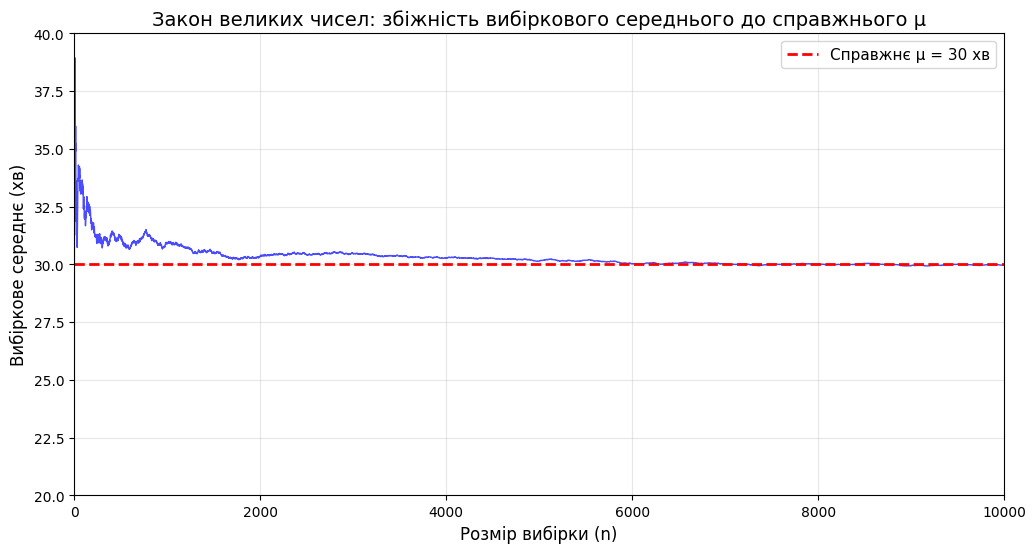

In [2]:
# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, cumulative_means, linewidth=1, color='blue', alpha=0.7)
plt.axhline(y=true_mean, color='red', linestyle='--', linewidth=2,
            label=f'Справжнє μ = {true_mean} хв')
plt.xlabel('Розмір вибірки (n)', fontsize=12)
plt.ylabel('Вибіркове середнє (хв)', fontsize=12)
plt.title('Закон великих чисел: збіжність вибіркового середнього до справжнього μ',
          fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, 10000)
plt.ylim(20, 40)
plt.show()

### Приклад 3. Візуалізація Центральної граничної теореми в дії

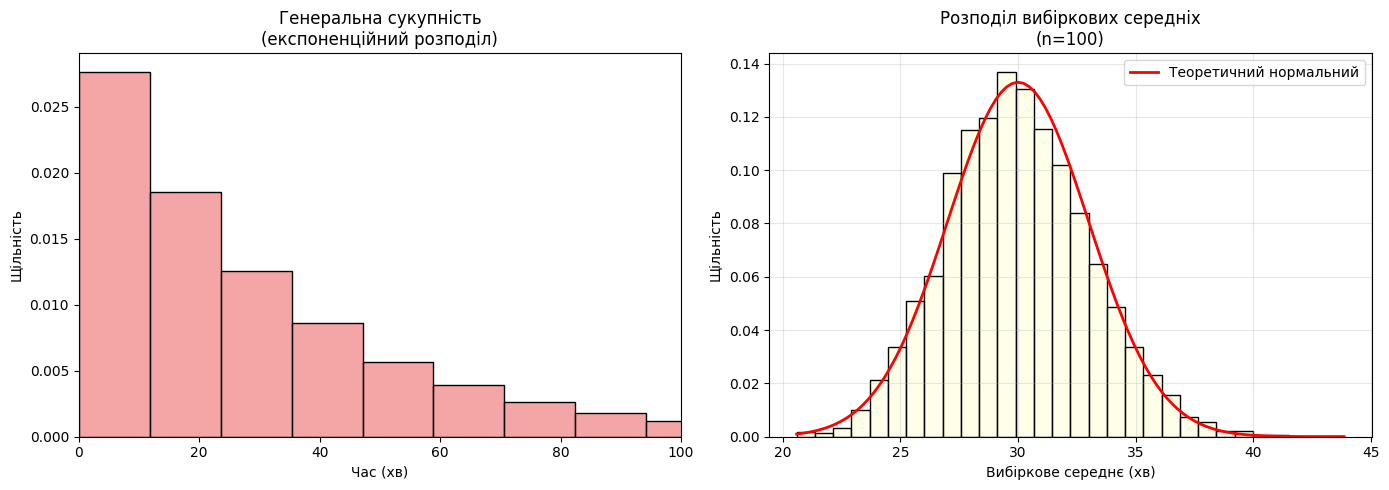

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Генеральна сукупність (Population)
pop_mean = 30
pop_data = np.random.exponential(scale=pop_mean, size=100000)

# 2. Параметри симуляції
n = 100              # Розмір вибірки
num_samples = 5000   # Кількість вибірок

# Генеруємо вибіркові середні
means = [np.mean(np.random.choice(pop_data, size=n)) for _ in range(num_samples)]

# 3. Побудова графіків
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Графік 1: Генеральна сукупність
sns.histplot(pop_data, bins=30, color='#f08080', edgecolor='black',
             ax=axes[0], stat='density', alpha=0.7)
axes[0].set_title('Генеральна сукупність\n(експоненційний розподіл)')
axes[0].set_xlabel('Час (хв)')
axes[0].set_ylabel('Щільність')
axes[0].set_xlim(0, 100)

# Графік 2: Розподіл вибіркових середніх (n=100)
sns.histplot(means, bins=30, color='#ffffe0', edgecolor='black',
             ax=axes[1], stat='density', alpha=0.7)

# Теоретична нормальна крива
mu_theoretical = pop_mean
sigma_theoretical = pop_mean / np.sqrt(n) # SE = sigma / sqrt(n)
x_range = np.linspace(min(means), max(means), 100)
pdf = stats.norm.pdf(x_range, mu_theoretical, sigma_theoretical)

axes[1].plot(x_range, pdf, 'r-', lw=2, label='Теоретичний нормальний')
axes[1].set_title(f'Розподіл вибіркових середніх\n(n={n})')
axes[1].set_xlabel('Вибіркове середнє (хв)')
axes[1].set_ylabel('Щільність')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
# Знаходимо значення z, яке залишає 2.5% у кожному хвості (95% в центрі)
z_value = stats.norm.ppf(0.975)
print(f"Для 95% довірчого інтервалу z = {z_value:.3f}")

Для 95% довірчого інтервалу z = 1.960


### Приклад 4. Візуалізація t-розподіл Стьюдента

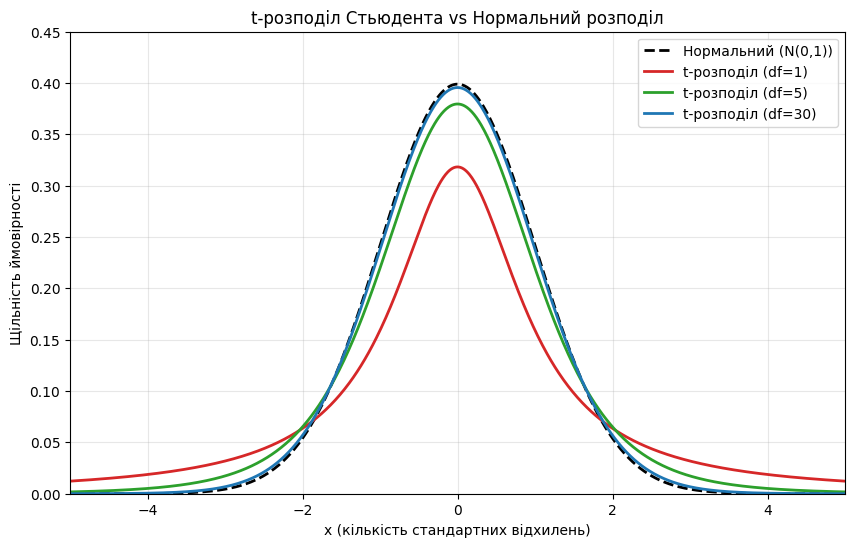

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Налаштування даних
x = np.linspace(-5, 5, 1000)

# Ступені вільності (degrees of freedom), які ми хочемо порівняти
dfs = [1, 5, 30]

plt.figure(figsize=(10, 6))

# 1. Малюємо Стандартний Нормальний розподіл (як еталон)
# Він відповідає t-розподілу при df -> нескінченність
plt.plot(x, stats.norm.pdf(x), color='black', linestyle='--', linewidth=2, label='Нормальний (N(0,1))')

# 2. Малюємо t-розподіли з різними df
colors = ['#d62728', '#2ca02c', '#1f77b4'] # Червоний, Зелений, Синій

for df, color in zip(dfs, colors):
    y = stats.t.pdf(x, df)
    plt.plot(x, y, color=color, linewidth=2, label=f't-розподіл (df={df})')

# Оформлення
plt.title('t-розподіл Стьюдента vs Нормальний розподіл')
plt.xlabel('x (кількість стандартних відхилень)')
plt.ylabel('Щільність ймовірності')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-5, 5)
plt.ylim(0, 0.45)

plt.show()

### Приклад 5. Побудова довірчого інтервалу

In [ ]:
import numpy as np
from scipy import stats

# Генеруємо дані для прикладу
np.random.seed(42)
user_times = np.random.uniform(5, 55, 100)

In [ ]:
# Крок 1: Рахуємо вибіркове середнє
sample_mean = np.mean(user_times)
print(f"Вибіркове середнє: {sample_mean:.2f} хв")

# Крок 2: Рахуємо вибіркове стандартне відхилення
# ddof=1 означає ділимо на (n-1) замість n
sample_std = np.std(user_times, ddof=1)
print(f"Вибіркове стандартне відхилення: {sample_std:.2f} хв")

# Крок 3: Рахуємо розмір вибірки
n = len(user_times)
print(f"Розмір вибірки: {n}")

# Крок 4: Рахуємо стандартну похибку
se = sample_std / np.sqrt(n)
print(f"Стандартна похибка SE = {se:.2f} хв")

Вибіркове середнє: 28.51 хв
Вибіркове стандартне відхилення: 14.87 хв
Розмір вибірки: 100
Стандартна похибка SE = 1.49 хв


In [ ]:
# Крок 5: Знаходимо критичне значення t
# Для 95% довірчого інтервалу alpha = 0.05
confidence_level = 0.95
alpha = 1 - confidence_level
degrees_of_freedom = n - 1

# stats.t.ppf знаходить значення t, яке залишає задану ймовірність зліва
# Нам потрібно залишити 2.5% справа, тобто 97.5% зліва
t_critical = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

print(f"\nКритичне значення t для {confidence_level*100}% довірчого інтервалу:")
print(f"Ступені свободи: {degrees_of_freedom}")
print(f"t-критичне: {t_critical:.3f}")


Критичне значення t для 95.0% довірчого інтервалу:
Ступені свободи: 99
t-критичне: 1.984


In [ ]:
# Крок 6: Будуємо довірчий інтервал
margin_of_error = t_critical * se
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"\n{confidence_level*100}% довірчий інтервал для середнього часу:")
print(f"Вибіркове середнє ± похибка: {sample_mean:.2f} ± {margin_of_error:.2f}")
print(f"Інтервал: [{lower_bound:.2f}, {upper_bound:.2f}] хв")
print(f"Ширина інтервалу: {upper_bound - lower_bound:.2f} хв")


95.0% довірчий інтервал для середнього часу:
Вибіркове середнє ± похибка: 28.51 ± 2.95
Інтервал: [25.56, 31.46] хв
Ширина інтервалу: 5.90 хв


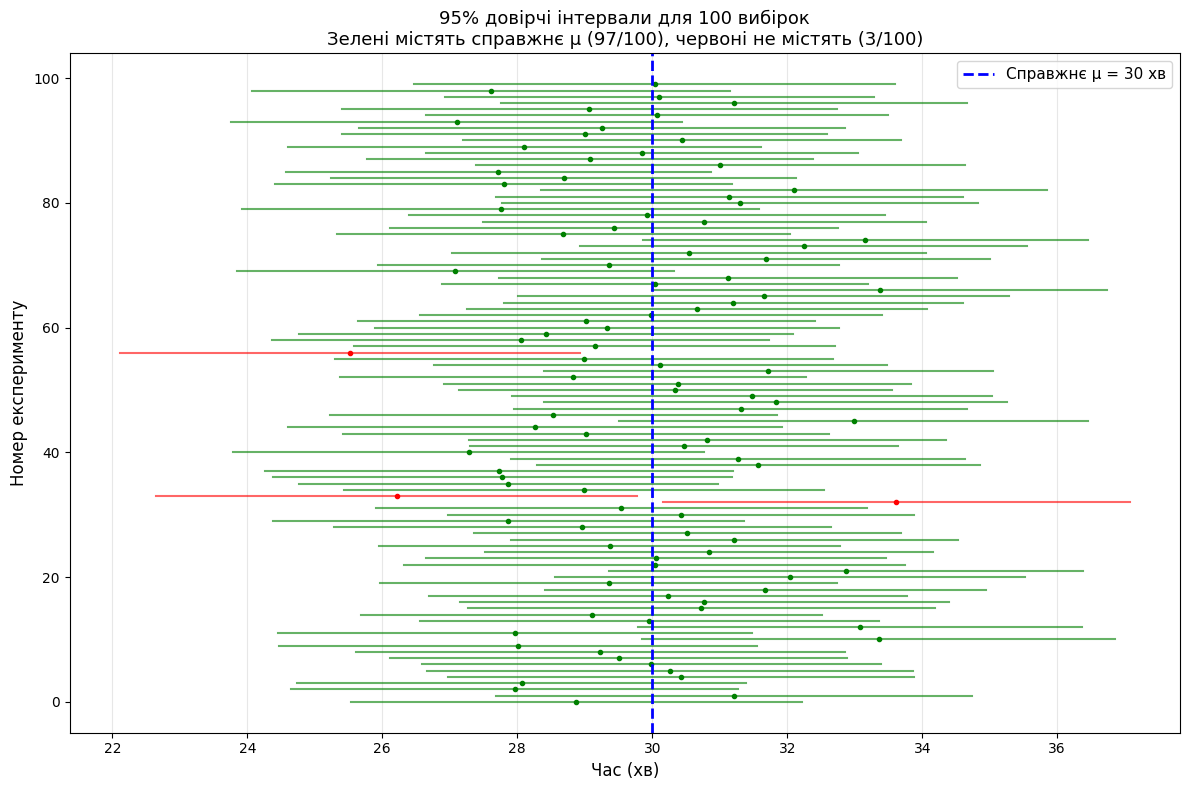

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Створюємо генеральну сукупність
np.random.seed(42)
population = np.random.uniform(0, 60, 100000)
true_mean = 30

# Параметри
sample_size = 100
n_experiments = 100
confidence_level = 0.95
alpha = 1 - confidence_level
degrees_of_freedom = sample_size - 1
t_critical = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

# Збираємо інтервали
intervals = []
sample_means_list = []
contains_true_mean = []

for i in range(n_experiments):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    se = sample_std / np.sqrt(sample_size)

    margin_of_error = t_critical * se
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    intervals.append((lower_bound, upper_bound))
    sample_means_list.append(sample_mean)

    if lower_bound <= true_mean <= upper_bound:
        contains_true_mean.append(True)
    else:
        contains_true_mean.append(False)

n_containing = sum(contains_true_mean)

# Візуалізація
plt.figure(figsize=(12, 8))

for i in range(n_experiments):
    lower_bound, upper_bound = intervals[i]
    sample_mean = sample_means_list[i]
    color = 'green' if contains_true_mean[i] else 'red'

    plt.plot([lower_bound, upper_bound], [i, i], color=color, linewidth=1.5, alpha=0.6)
    plt.plot(sample_mean, i, 'o', color=color, markersize=3)

plt.axvline(x=true_mean, color='blue', linestyle='--', linewidth=2,
            label=f'Справжнє μ = {true_mean} хв')
plt.xlabel('Час (хв)', fontsize=12)
plt.ylabel('Номер експерименту', fontsize=12)
plt.title(f'95% довірчі інтервали для {n_experiments} вибірок\n' +
          f'Зелені містять справжнє μ ({n_containing}/{n_experiments}), ' +
          f'червоні не містять ({n_experiments - n_containing}/{n_experiments})',
          fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Приклад 6. Довірчі інтервали з різними рівнями довіри

In [ ]:
import numpy as np
from scipy import stats

# Та сама вибірка що і раніше
np.random.seed(42)
user_times = np.random.uniform(5, 55, 100)

sample_mean = np.mean(user_times)
sample_std = np.std(user_times, ddof=1)
n = len(user_times)
se = sample_std / np.sqrt(n)
degrees_of_freedom = n - 1

# Різні рівні довіри
confidence_levels = [0.90, 0.95, 0.99]

print(f"Вибіркове середнє: {sample_mean:.2f} хв")
print(f"Стандартна похибка: {se:.2f} хв\n")

for conf_level in confidence_levels:
    alpha = 1 - conf_level
    t_critical = stats.t.ppf(1 - alpha/2, degrees_of_freedom)
    margin_of_error = t_critical * se
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    width = upper_bound - lower_bound

    print(f"{int(conf_level*100)}% довірчий інтервал:")
    print(f"  Критичне значення t: {t_critical:.3f}")
    print(f"  Інтервал: [{lower_bound:.2f}, {upper_bound:.2f}] хв")
    print(f"  Ширина: {width:.2f} хв\n")

Вибіркове середнє: 28.51 хв
Стандартна похибка: 1.49 хв

90% довірчий інтервал:
  Критичне значення t: 1.660
  Інтервал: [26.04, 30.98] хв
  Ширина: 4.94 хв

95% довірчий інтервал:
  Критичне значення t: 1.984
  Інтервал: [25.56, 31.46] хв
  Ширина: 5.90 хв

99% довірчий інтервал:
  Критичне значення t: 2.626
  Інтервал: [24.60, 32.42] хв
  Ширина: 7.81 хв



### Приклад 7. Як розмір вибірки впливає на ширину довірчого інтервалу

In [ ]:
# Генеруємо велику генеральну сукупність
np.random.seed(42)
population = np.random.uniform(5, 55, 100000)

# Різні розміри вибірки
sample_sizes = [30, 100, 500, 1000]
confidence_level = 0.95

print("Ширина 95% довірчого інтервалу для різних розмірів вибірки:\n")

for n in sample_sizes:
    sample = np.random.choice(population, size=n, replace=False)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    se = sample_std / np.sqrt(n)

    degrees_of_freedom = n - 1
    t_critical = stats.t.ppf(0.975, degrees_of_freedom)
    margin_of_error = t_critical * se
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    width = upper_bound - lower_bound

    print(f"n = {n:4d}: [{lower_bound:.2f}, {upper_bound:.2f}], ширина = {width:.2f} хв")

Ширина 95% довірчого інтервалу для різних розмірів вибірки:

n =   30: [24.37, 34.42], ширина = 10.05 хв
n =  100: [28.08, 33.94], ширина = 5.87 хв
n =  500: [28.54, 31.00], ширина = 2.47 хв
n = 1000: [28.17, 29.95], ширина = 1.78 хв


### Приклад 8. Ілюстрація "Спектр кореляції Пірсона"

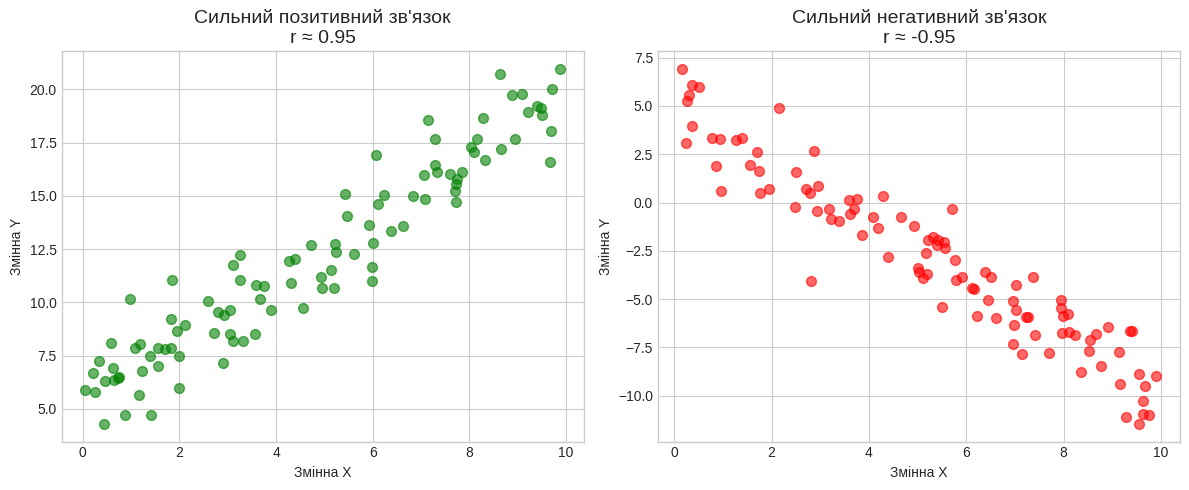

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Налаштування
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

def generate_data(n, slope, noise):
    x = np.random.rand(n) * 10
    # y = kx + b + noise
    y = slope * x + 5 + np.random.randn(n) * noise
    return x, y

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Сильний позитивний (зростаючий)
x1, y1 = generate_data(100, slope=1.5, noise=1.5)
r1, _ = pearsonr(x1, y1)
axes[0].scatter(x1, y1, color='green', alpha=0.6, s=50)
axes[0].set_title(f'Сильний позитивний зв\'язок\nr ≈ {r1:.2f}', fontsize=14)
axes[0].set_xlabel('Змінна X')
axes[0].set_ylabel('Змінна Y')

# 2. Сильний негативний (спадаючий)
x2, y2 = generate_data(100, slope=-1.5, noise=1.5)
r2, _ = pearsonr(x2, y2)
axes[1].scatter(x2, y2, color='red', alpha=0.6, s=50)
axes[1].set_title(f'Сильний негативний зв\'язок\nr ≈ {r2:.2f}', fontsize=14)
axes[1].set_xlabel('Змінна X')
axes[1].set_ylabel('Змінна Y')

plt.tight_layout()
plt.show()

### Приклад 9. Ілюстрація "Геометричний зміст кореляції"

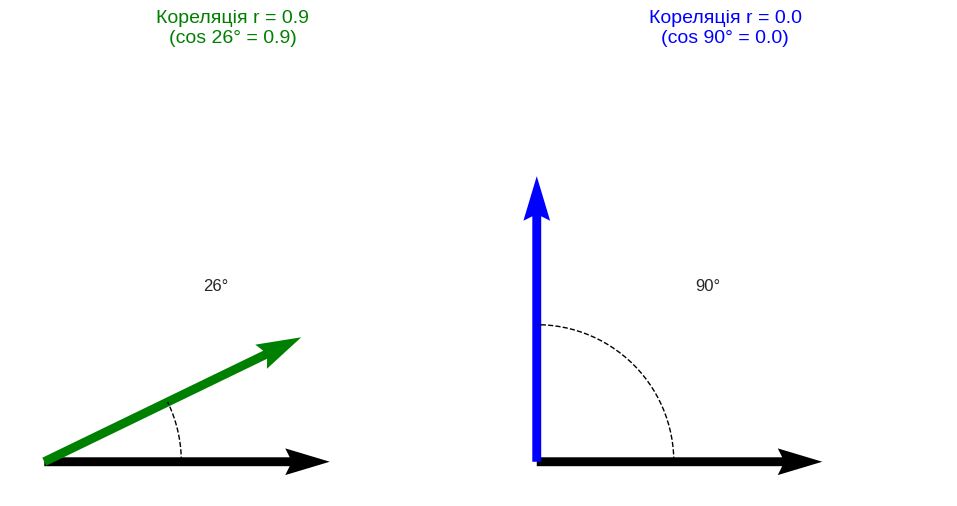

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector_angle(ax, r_target, color):
    # r = cos(angle), тому angle = arccos(r)
    theta = np.arccos(r_target)

    # Координати векторів (довжина 1)
    vec_x = np.array([1, 0])
    vec_y = np.array([np.cos(theta), np.sin(theta)])

    # Малюємо стрілки
    ax.quiver(0, 0, vec_x[0], vec_x[1], angles='xy', scale_units='xy', scale=1.2, color='black', width=0.02, label='Вектор X')
    ax.quiver(0, 0, vec_y[0], vec_y[1], angles='xy', scale_units='xy', scale=1.2, color=color, width=0.02, label='Вектор Y')

    # Малюємо дугу кута
    arc_points = np.linspace(0, theta, 30)
    arc_radius = 0.4
    ax.plot(arc_radius * np.cos(arc_points), arc_radius * np.sin(arc_points), 'k--', lw=1)

    # Текст
    degrees = np.degrees(theta)
    ax.text(0.5, 0.5, f'{degrees:.0f}°', fontsize=12, ha='center')

    ax.set_xlim(-0.1, 1.2)
    ax.set_ylim(-0.1, 1.2)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Кореляція r = {r_target}\n(cos {degrees:.0f}° = {r_target})', fontsize=14, color=color)

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # Changed to 1 row, 2 columns

# Три випадки: гострий кут, прямий, тупий
plot_vector_angle(axes[0], r_target=0.9, color='green')  # Майже співпадають
plot_vector_angle(axes[1], r_target=0.0, color='blue')   # Перпендикулярні

plt.tight_layout()
plt.show()

### Приклад 10. Ілюстрація "Пастка нелінійності"

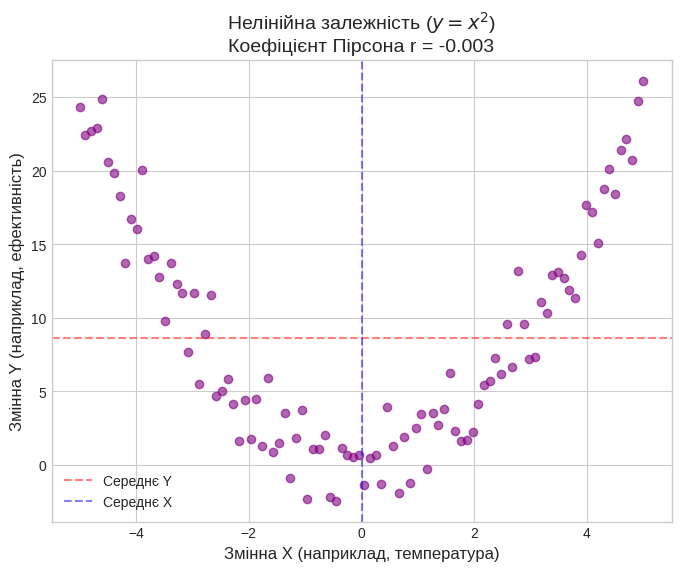

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Генеруємо дані для y = x^2
x_quad = np.linspace(-5, 5, 100)
# Додамо трохи шуму, щоб це виглядало як реальні дані
y_quad = x_quad**2 + np.random.randn(100) * 2

# Рахуємо кореляцію Пірсона
r_quad, _ = pearsonr(x_quad, y_quad)

plt.figure(figsize=(8, 6))
plt.scatter(x_quad, y_quad, color='purple', alpha=0.6)
plt.title(f'Нелінійна залежність ($y = x^2$)\nКоефіцієнт Пірсона r = {r_quad:.3f}', fontsize=14)
plt.xlabel('Змінна X (наприклад, температура)', fontsize=12)
plt.ylabel('Змінна Y (наприклад, ефективність)', fontsize=12)

# Додамо лінії, що показують середні значення, щоб зрозуміти, чому r близький до 0
plt.axhline(np.mean(y_quad), color='red', linestyle='--', alpha=0.5, label='Середнє Y')
plt.axvline(np.mean(x_quad), color='blue', linestyle='--', alpha=0.5, label='Середнє X')

plt.legend()
plt.grid(True)
plt.show()

### Приклад 11. Обчислення кореляції та регресії

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# Генеруємо дані
np.random.seed(42)
n = 100

age = np.random.uniform(18, 65, n)
time_in_app = 10 + 0.5 * age + np.random.normal(0, 8, n)

In [ ]:
correlation, p_value = stats.pearsonr(age, time_in_app)

print(f"Коефіцієнт кореляції Пірсона: r = {correlation:.3f}")
print(f"p-value: {p_value:.4f}")

Коефіцієнт кореляції Пірсона: r = 0.633
p-value: 0.0000


In [ ]:
X = age.reshape(-1, 1)
y = time_in_app

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"Коефіцієнти регресії:")
print(f"intercept = {beta_0:.2f}")
print(f"slope = {beta_1:.3f}")
print(f"\nРівняння: ŷ = {beta_0:.2f} + {beta_1:.3f} * x")

Коефіцієнти регресії:
intercept = 13.13
slope = 0.422

Рівняння: ŷ = 13.13 + 0.422 * x


In [ ]:
r_squared = model.score(X, y)

print(f"Коефіцієнт детермінації: R² = {r_squared:.5f}")
print(f"Модель пояснює {r_squared*100:.1f}% варіації даних")
print(f"\nДля простої лінійної регресії R² має дорівнювати r² = {correlation**2:.3f}")

Коефіцієнт детермінації: R² = 0.40007
Модель пояснює 40.0% варіації даних

Для простої лінійної регресії R² має дорівнювати r² = 0.400


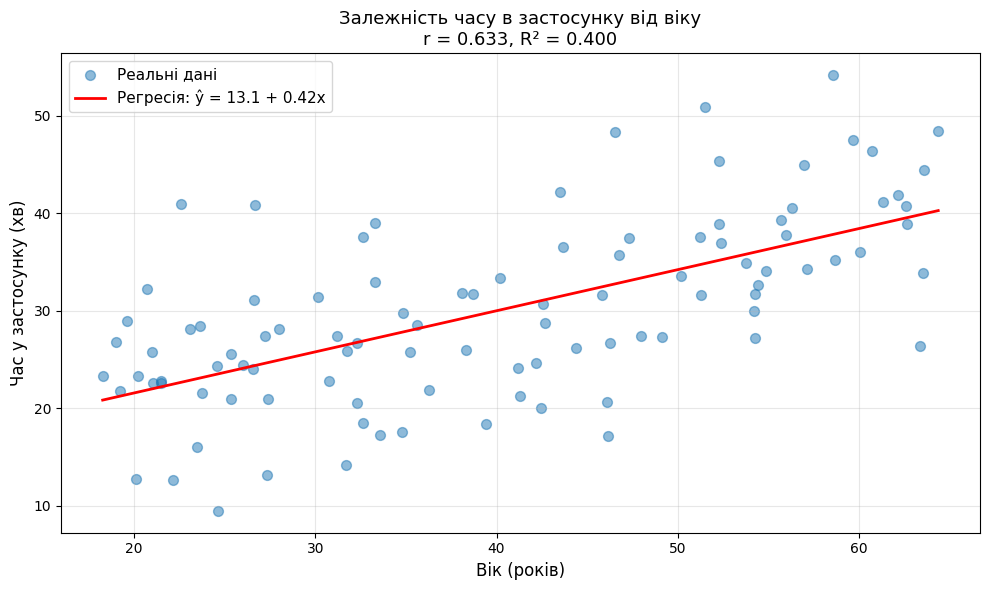

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(age, time_in_app, alpha=0.5, s=50, label='Реальні дані')

age_range = np.linspace(age.min(), age.max(), 100)
time_predicted = beta_0 + beta_1 * age_range
plt.plot(age_range, time_predicted, 'r-', linewidth=2,
         label=f'Регресія: ŷ = {beta_0:.1f} + {beta_1:.2f}x')

plt.xlabel('Вік (років)', fontsize=12)
plt.ylabel('Час у застосунку (хв)', fontsize=12)
plt.title(f'Залежність часу в застосунку від віку\nr = {correlation:.3f}, R² = {r_squared:.3f}',
          fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
new_age = 40
new_age_array = np.array([[new_age]])
predicted_time = model.predict(new_age_array)[0]

print(f"Передбачення для користувача віком {new_age} років:")
print(f"Очікуваний час у застосунку: {predicted_time:.1f} хв")

y_predicted_all = model.predict(X)
residuals = y - y_predicted_all
residual_std = np.std(residuals, ddof=1)

print(f"\nСтандартне відхилення залишків: {residual_std:.2f} хв")
print(f"Типова похибка передбачення: ±{residual_std:.2f} хв")
print(f"Тобто реальне значення ймовірно від {predicted_time - residual_std:.1f} до {predicted_time + residual_std:.1f} хв")

Передбачення для користувача віком 40 років:
Очікуваний час у застосунку: 30.0 хв

Стандартне відхилення залишків: 7.22 хв
Типова похибка передбачення: ±7.22 хв
Тобто реальне значення ймовірно від 22.8 до 37.2 хв


### Приклад 12. Знаходження p-value для рівня значущості

In [ ]:
from scipy import stats

t_statistic = 1.33
degrees_of_freedom = 99

# Для двостороннього тесту множимо на 2
p_value = 2 * (1 - stats.t.cdf(t_statistic, degrees_of_freedom))

print(f"Тестова статистика: t = {t_statistic}")
print(f"p-value = {p_value:.3f}")

Тестова статистика: t = 1.33
p-value = 0.187


### Приклад 13. Перевірка середнього значення за допомогою одновибіркового t-тесту

In [ ]:
import numpy as np
from scipy import stats

# Генеруємо дані: 100 користувачів
np.random.seed(42)
user_times = np.random.normal(32, 15, 100)

# Перевіряємо гіпотезу що μ = 30
mu_0 = 30

# Виконуємо одновибірковий t-test
t_statistic, p_value = stats.ttest_1samp(user_times, mu_0)

print(f"Вибіркове середнє: {np.mean(user_times):.2f} хв")
print(f"Вибіркове стандартне відхилення: {np.std(user_times, ddof=1):.2f} хв")
print(f"Розмір вибірки: {len(user_times)}")

print(f"\nТестова статистика: t = {t_statistic:.3f}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print(f"\nВисновок: відкидаємо H₀ (p < 0.05)")
    print(f"Середній час статистично значущо відрізняється від {mu_0} хв")
else:
    print(f"\nВисновок: не відкидаємо H₀ (p ≥ 0.05)")
    print(f"Немає достатніх доказів що середній час відрізняється від {mu_0} хв")

Вибіркове середнє: 30.44 хв
Вибіркове стандартне відхилення: 13.62 хв
Розмір вибірки: 100

Тестова статистика: t = 0.325
p-value = 0.7461

Висновок: не відкидаємо H₀ (p ≥ 0.05)
Немає достатніх доказів що середній час відрізняється від 30 хв
